# Text Generation with Neural Networks

## Functions for Processing Text

### Reading in files as a string text

In [1]:
def read_file(filepath):
    
    with open(filepath) as f:
        str_text = f.read()
    
    return str_text

In [9]:
read_file('./0 resources/moby_dick_four_chapters.txt')  #there are lots \n and other symbols

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople\'s hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is nothing surprising in this.  If t

In [4]:
len(read_file("./0 resources/melville-moby_dick.txt"))

1198622

### Tokenize and Clean Text

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'tagger','ner'])

nlp.max_length = 1198623   # when you work with really large files spaCy complains,
#so we need to define the max length which is : 1198622 in this case

In [16]:
[token.text for token in nlp("hey there!!")]  #example of what's happening below

['hey', 'there', '!', '!']

In [17]:
# our may ML algorithm may overfit the symbols like .!? etc.

def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [34]:
d = read_file('./0 resources/moby_dick_four_chapters.txt')
tokens = separate_punc(d)

In [35]:
tokens

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such',
 'an',
 'upper',
 'hand',
 '

In [38]:
len(tokens)

11338

In [39]:
4431/25

177.24

## Create Sequences of Tokens

In [40]:
# organize into sequences of tokens
train_len = 25+1 # 50 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):  # i starts from 26, for first iter seq= 26-26=0,26 
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [41]:
' '.join(text_sequences[0])

'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on'

In [42]:
' '.join(text_sequences[1])

'me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore'

In [43]:
' '.join(text_sequences[2])

'ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i'

In [ ]:
len(text_sequences)

# Keras

### Keras Tokenization

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [46]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)   #fits
sequences = tokenizer.texts_to_sequences(text_sequences)  #transform

In [52]:
#each integer denotes an Unique ID for each word
print(sequences[0],"\n") 
print(sequences[1])

[956, 14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24] 

[14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957]


In [57]:
tokenizer.index_word

{1: 'the',
 2: 'a',
 3: 'and',
 4: 'of',
 5: 'i',
 6: 'to',
 7: 'in',
 8: 'it',
 9: 'that',
 10: 'he',
 11: 'his',
 12: 'was',
 13: 'but',
 14: 'me',
 15: 'with',
 16: 'as',
 17: 'at',
 18: 'this',
 19: 'you',
 20: 'is',
 21: 'all',
 22: 'for',
 23: 'my',
 24: 'on',
 25: 'be',
 26: "'s",
 27: 'not',
 28: 'from',
 29: 'there',
 30: 'one',
 31: 'up',
 32: 'what',
 33: 'him',
 34: 'so',
 35: 'bed',
 36: 'now',
 37: 'about',
 38: 'no',
 39: 'into',
 40: 'by',
 41: 'were',
 42: 'out',
 43: 'or',
 44: 'harpooneer',
 45: 'had',
 46: 'then',
 47: 'have',
 48: 'an',
 49: 'upon',
 50: 'little',
 51: 'some',
 52: 'old',
 53: 'like',
 54: 'if',
 55: 'they',
 56: 'would',
 57: 'do',
 58: 'over',
 59: 'landlord',
 60: 'thought',
 61: 'room',
 62: 'when',
 63: 'could',
 64: "n't",
 65: 'night',
 66: 'here',
 67: 'head',
 68: 'such',
 69: 'which',
 70: 'man',
 71: 'did',
 72: 'sea',
 73: 'time',
 74: 'other',
 75: 'very',
 76: 'go',
 77: 'these',
 78: 'more',
 79: 'though',
 80: 'first',
 81: 'sort',


In [62]:
print(sequences)

[[956, 14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24], [14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957], [263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5], [51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5, 60], [261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5, 60, 5], [408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5, 60, 5, 56], [87, 219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5, 60, 5, 56, 316], [219, 129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 14, 24, 957, 5, 60, 5, 56, 316, 37], [129, 111, 954, 260, 50, 43, 38, 315, 7, 23, 546, 3, 150, 259, 6, 2712, 1

In [58]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

956 : call
14 : me
263 : ishmael
51 : some
261 : years
408 : ago
87 : never
219 : mind
129 : how
111 : long
954 : precisely
260 : having
50 : little
43 : or
38 : no
315 : money
7 : in
23 : my
546 : purse
3 : and
150 : nothing
259 : particular
6 : to
2712 : interest
14 : me
24 : on


In [63]:
tokenizer.word_counts

OrderedDict([('call', 27),
             ('me', 2471),
             ('ishmael', 133),
             ('some', 758),
             ('years', 135),
             ('ago', 84),
             ('never', 449),
             ('mind', 164),
             ('how', 321),
             ('long', 374),
             ('precisely', 37),
             ('having', 142),
             ('little', 767),
             ('or', 950),
             ('no', 1003),
             ('money', 120),
             ('in', 5647),
             ('my', 1786),
             ('purse', 71),
             ('and', 9646),
             ('nothing', 281),
             ('particular', 152),
             ('to', 6497),
             ('interest', 24),
             ('on', 1716),
             ('shore', 26),
             ('i', 7150),
             ('thought', 676),
             ('would', 702),
             ('sail', 104),
             ('about', 1014),
             ('a', 10377),
             ('see', 416),
             ('the', 15540),
             ('watery', 26),
  

In [65]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

2717

### Convert to Numpy Matrix

In [66]:
import numpy as np

In [67]:
sequences = np.array(sequences)

In [71]:
sequences   # first 25 words will act as train data and last word will act as label(or target)

array([[ 956,   14,  263, ..., 2712,   14,   24],
       [  14,  263,   51, ...,   14,   24,  957],
       [ 263,   51,  261, ...,   24,  957,    5],
       ...,
       [ 952,   12,  166, ...,  262,   53,    2],
       [  12,  166, 2711, ...,   53,    2, 2717],
       [ 166, 2711,    3, ...,    2, 2717,   26]])

# Creating an LSTM based model

In [73]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding

In [123]:
seq_len, vocabulary_size

(25, 2717)

In [74]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))    #Good Practice: number of LSTM neurons must be atleast 2x or than the seq_len
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

### Train / Test Split

In [76]:
from tensorflow.keras.utils import to_categorical

In [77]:
sequences

array([[ 956,   14,  263, ..., 2712,   14,   24],
       [  14,  263,   51, ...,   14,   24,  957],
       [ 263,   51,  261, ...,   24,  957,    5],
       ...,
       [ 952,   12,  166, ...,  262,   53,    2],
       [  12,  166, 2711, ...,   53,    2, 2717],
       [ 166, 2711,    3, ...,    2, 2717,   26]])

In [78]:
# First 49 words
sequences[:,:-1]

array([[ 956,   14,  263, ...,    6, 2712,   14],
       [  14,  263,   51, ..., 2712,   14,   24],
       [ 263,   51,  261, ...,   14,   24,  957],
       ...,
       [ 952,   12,  166, ...,   11,  262,   53],
       [  12,  166, 2711, ...,  262,   53,    2],
       [ 166, 2711,    3, ...,   53,    2, 2717]])

In [85]:
# last Word
sequences[:,-1]

array([  24,  957,    5, ...,    2, 2717,   26])

In [86]:
X = sequences[:,:-1]   #leaves the last word as it'll be used as label

In [95]:
y = sequences[:,-1]    #grabs only the last word of each sequence which will be used as Label

In [96]:
y = to_categorical(y, num_classes=vocabulary_size+1)  #OHE, number of classes is taken +1 than the vocabulary size

In [97]:
X.shape   #there are 11312 sequences 

(11312, 25)

In [98]:
seq_len = X.shape[1]

In [99]:
seq_len

25

### Training the Model

In [104]:
# define model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 25)            67950     
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 150)           105600    
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 2718)              410418    
Total params: 787,218
Trainable params: 787,218
Non-trainable params: 0
_________________________________________________________________


---

----

In [105]:
from pickle import dump,load

In [106]:
# fit model
model.fit(X, y, batch_size=128, epochs=2,verbose=1)

Epoch 1/2
89/89 [==============================] - 16s 143ms/step - loss: 7.1915 - accuracy: 0.0424
Epoch 2/2
89/89 [==============================] - 13s 143ms/step - loss: 6.3621 - accuracy: 0.0542


In [107]:
# save the model to file
model.save('epochBIG.h5')
# save the tokenizer
dump(tokenizer, open('epochBIG', 'wb'))

# Generating New Text

In [109]:
from random import randint
from pickle import load
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

### Grab a random seed sequence

In [111]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [112]:
import random
random.seed(101)
random_pick = random.randint(0,len(text_sequences))

In [113]:
random_seed_text = text_sequences[random_pick]

In [114]:
random_seed_text

['thought',
 'i',
 'to',
 'myself',
 'the',
 'man',
 "'s",
 'a',
 'human',
 'being',
 'just',
 'as',
 'i',
 'am',
 'he',
 'has',
 'just',
 'as',
 'much',
 'reason',
 'to',
 'fear',
 'me',
 'as',
 'i',
 'have']

In [115]:
seed_text = ' '.join(random_seed_text)

In [116]:
seed_text

"thought i to myself the man 's a human being just as i am he has just as much reason to fear me as i have"

In [117]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)

/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the'

### Exploring Generated Sequence

In [119]:
full_text = read_file('./0 resources/moby_dick_four_chapters.txt')

In [120]:
for i,word in enumerate(full_text.split()):
    if word == 'inkling':
        print(' '.join(full_text.split()[i-20:i+20]))
        print('\n')

were stains of some sort or other. At first I knew not what to make of this; but soon an inkling of the truth occurred to me. I remembered a story of a white man--a whaleman too--who, falling among the




## Great Job!

# Resources to learn RNN with LSTM

Generic Representation of a RNN containing single Layer 

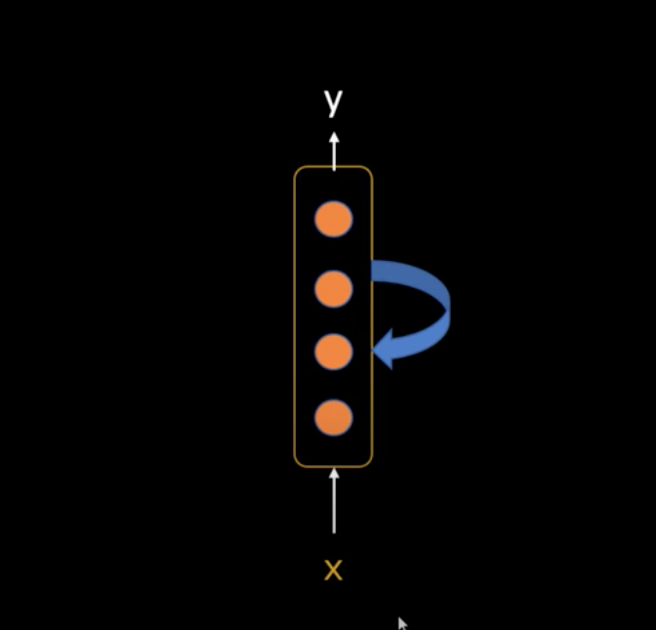

**Single RNN layer with different time stamps:
Explanation : It's a Named Entity Recognizer for "names" since Dhaval and Baby Yoda is a name 1 is the output , else for word "loves" 0 is the output**

**example: for second word: since dhaval is name 1 is the output, and along with 1 a new word is entered, this process goes on for entire sentence** 

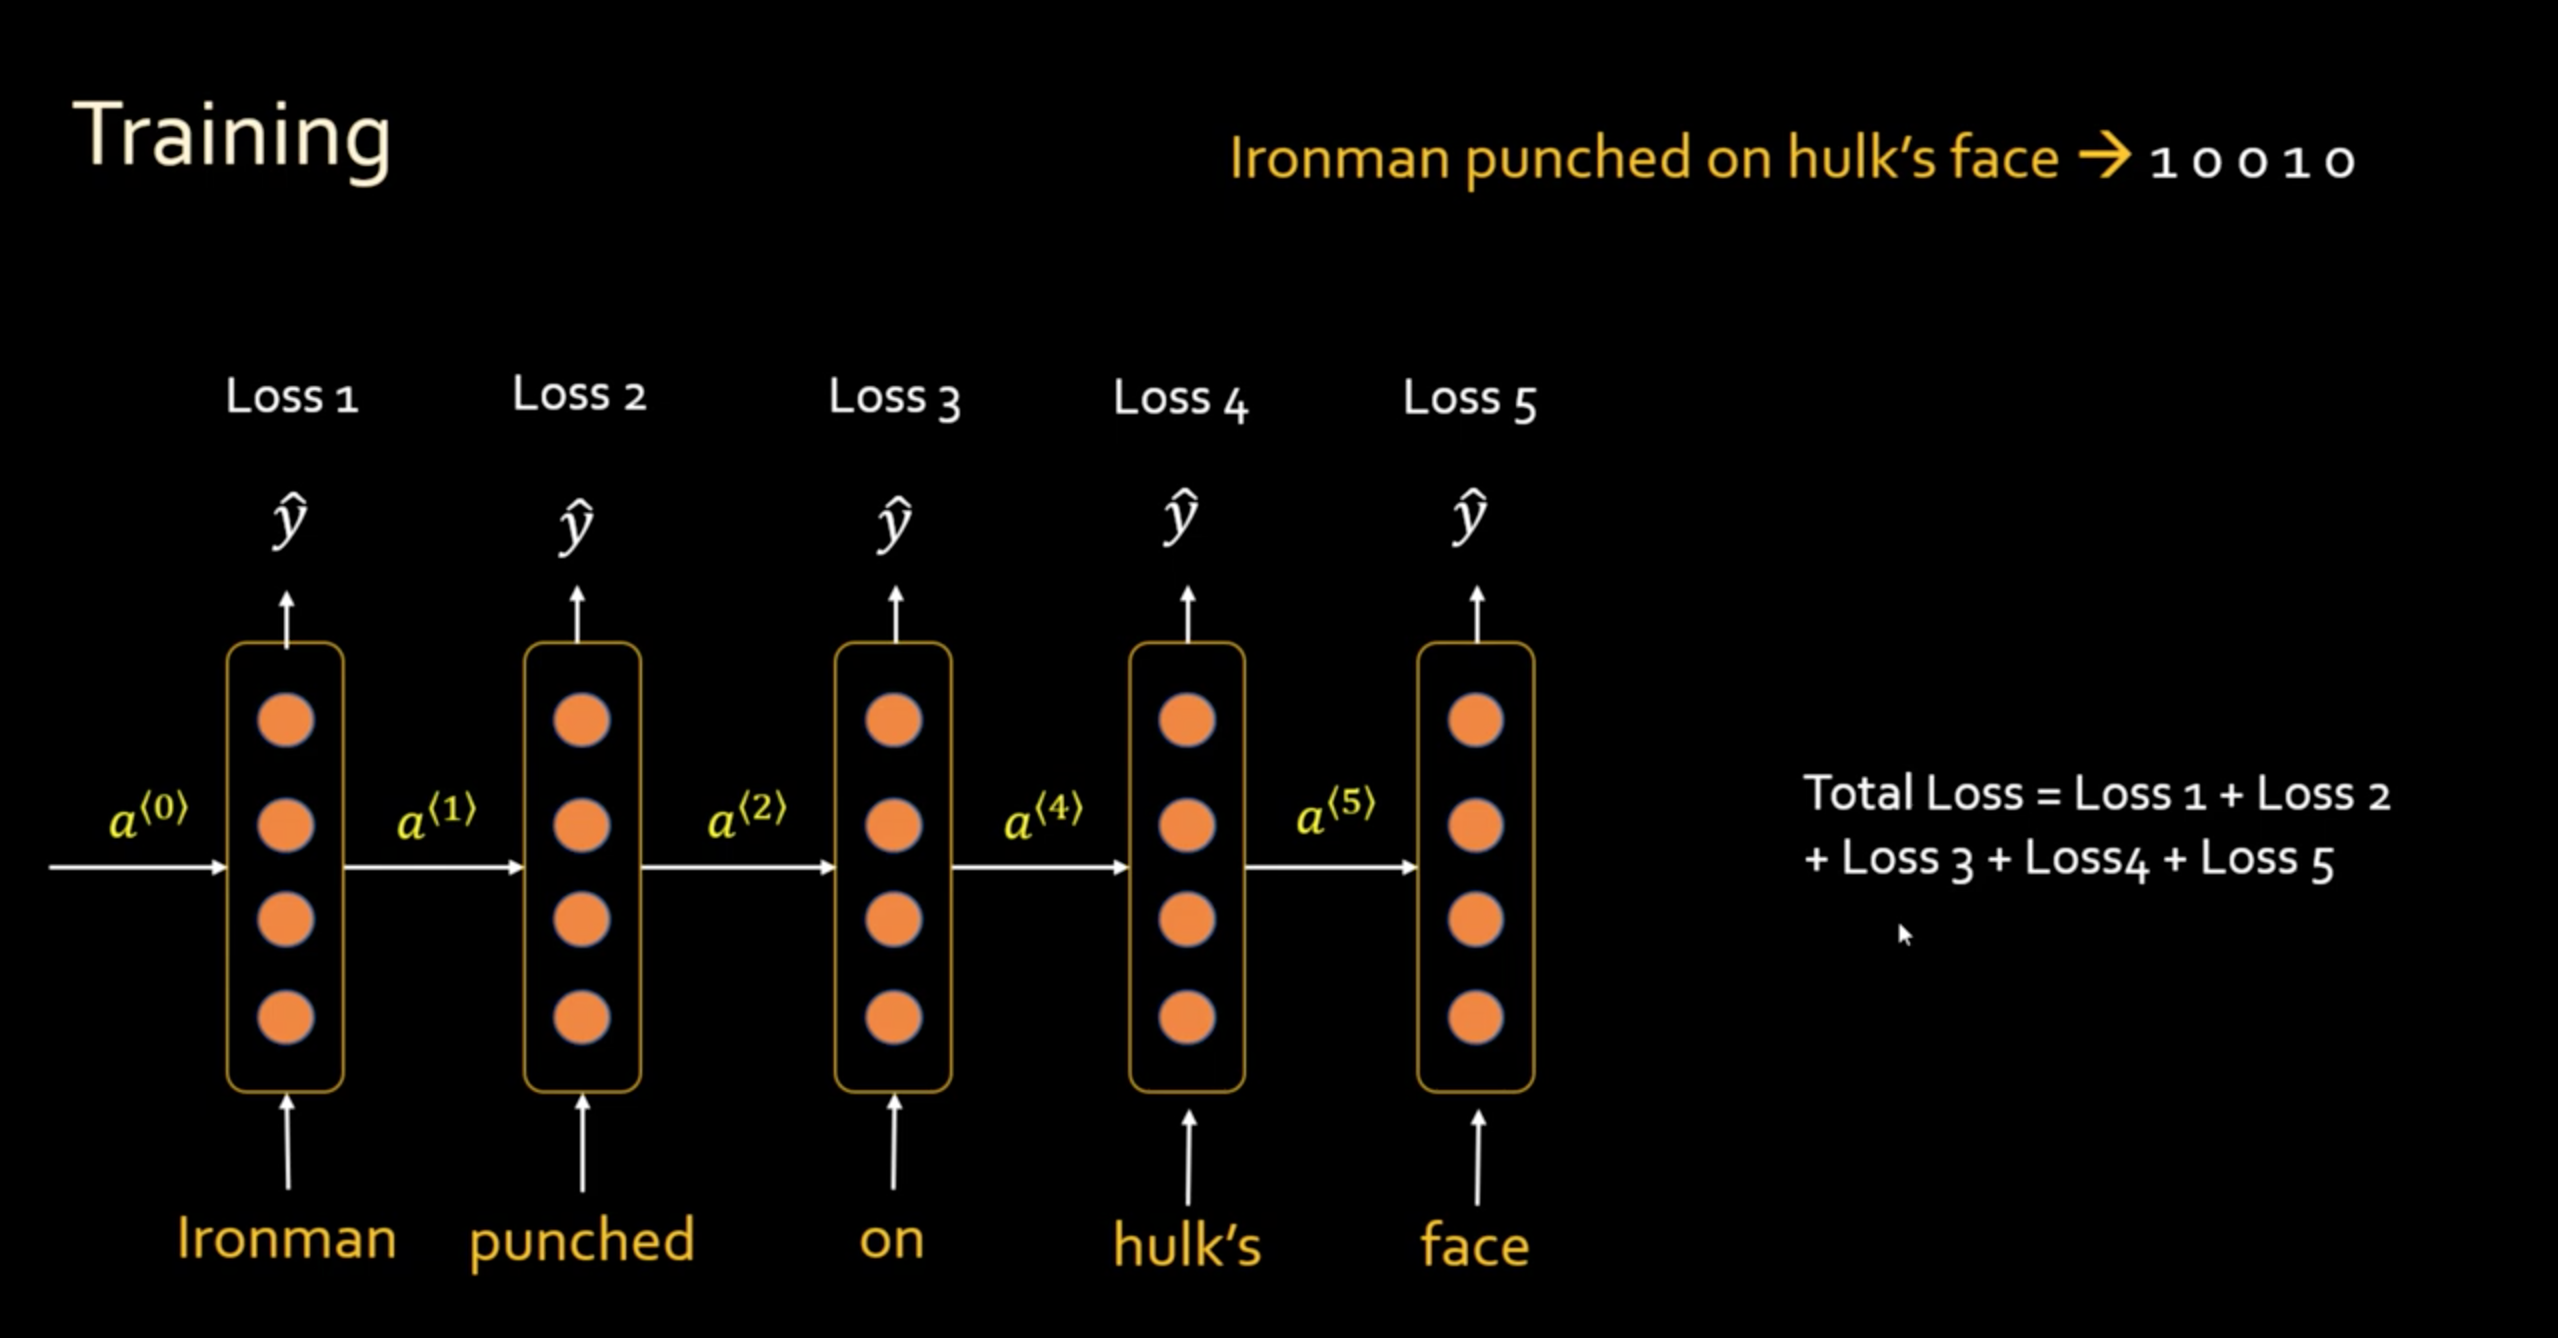

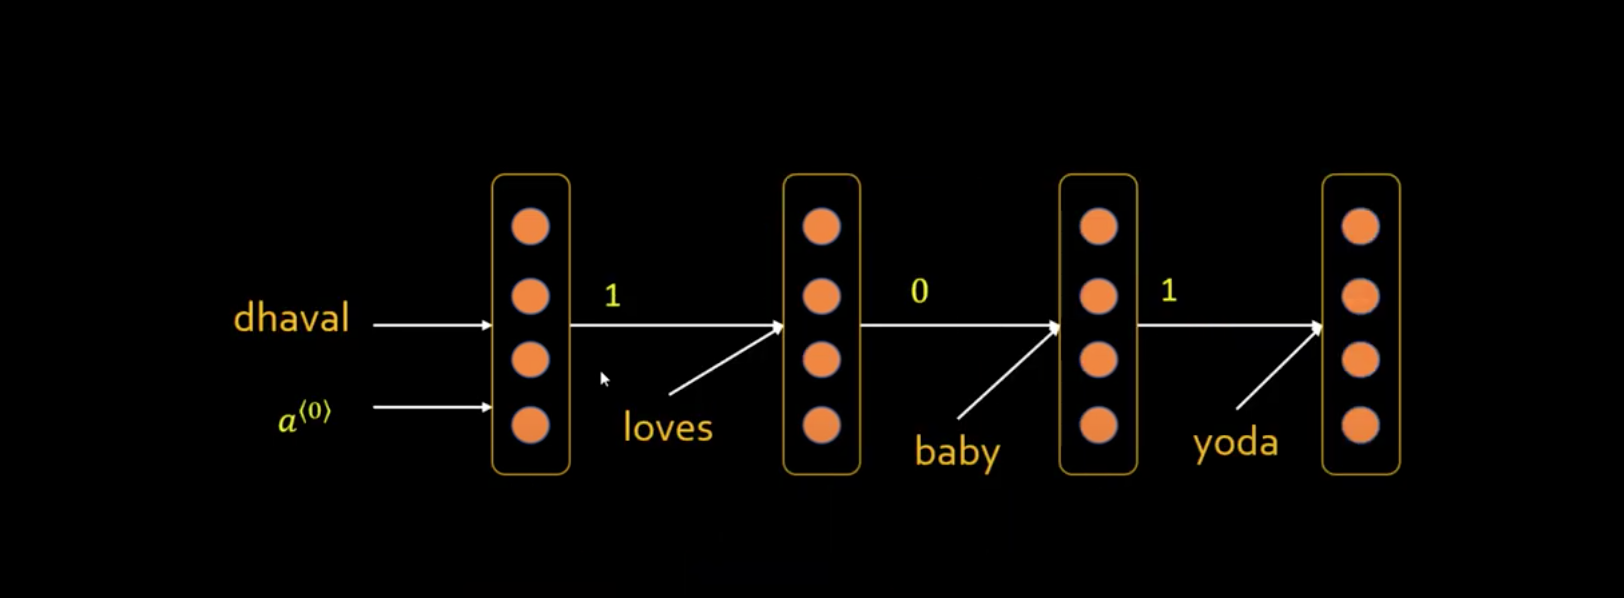

## Shortcoming of RNN explained 
**with example that each memory cell is able to remember only last 2 words. As it learns new words it forgets previous words**

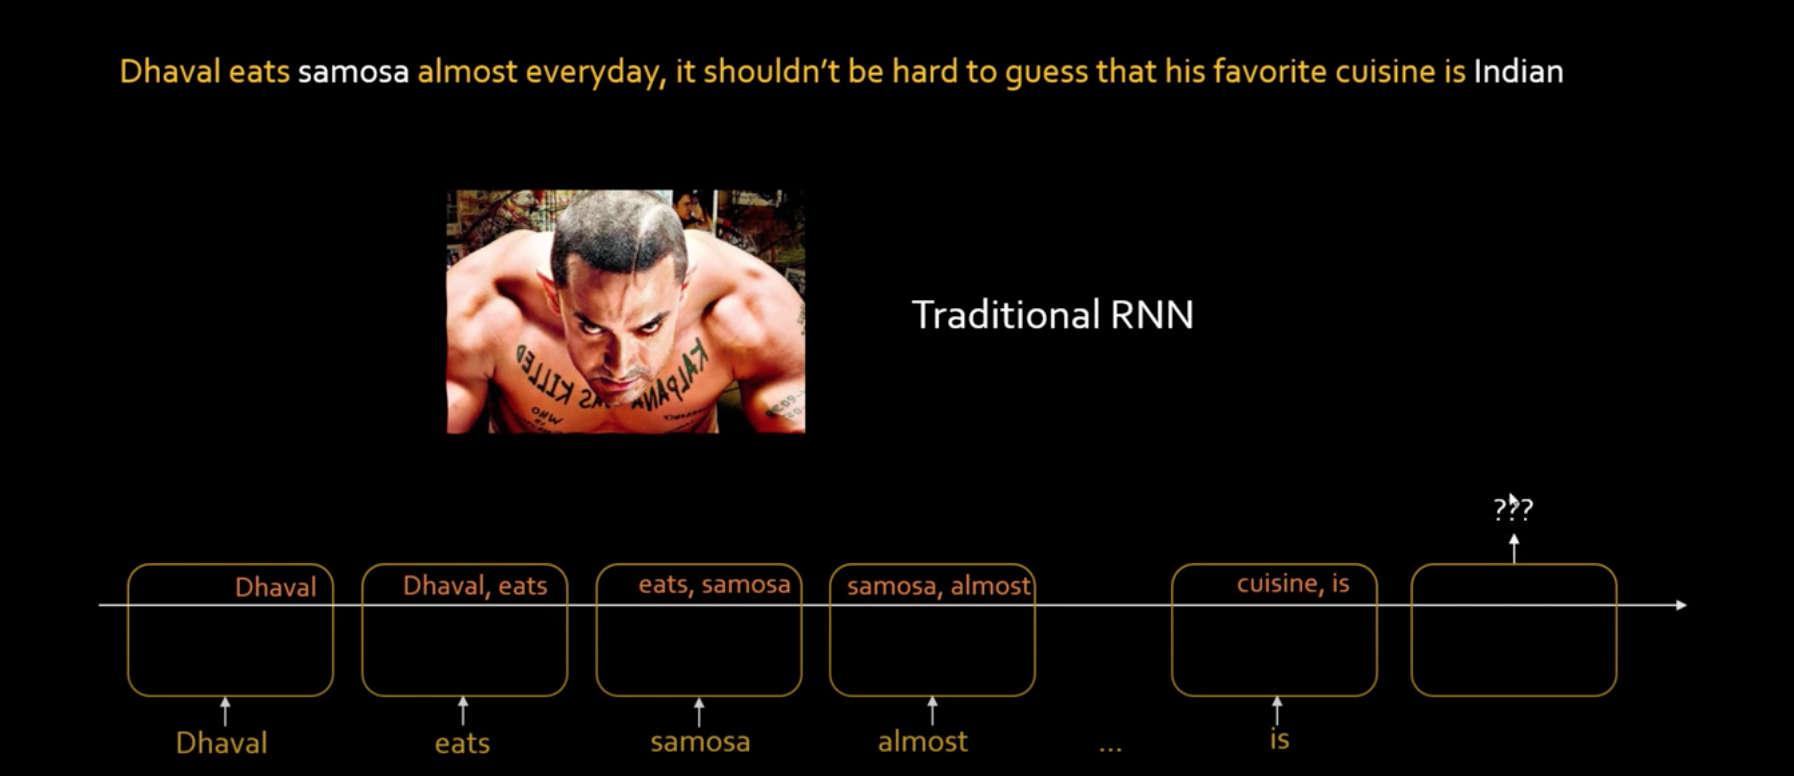

## LSTM working with example

To overcome the shortcomings of RNN we use LSTM as it's used to remember important keywords over time(through out the entire text). And these keywords help RNN for prediction

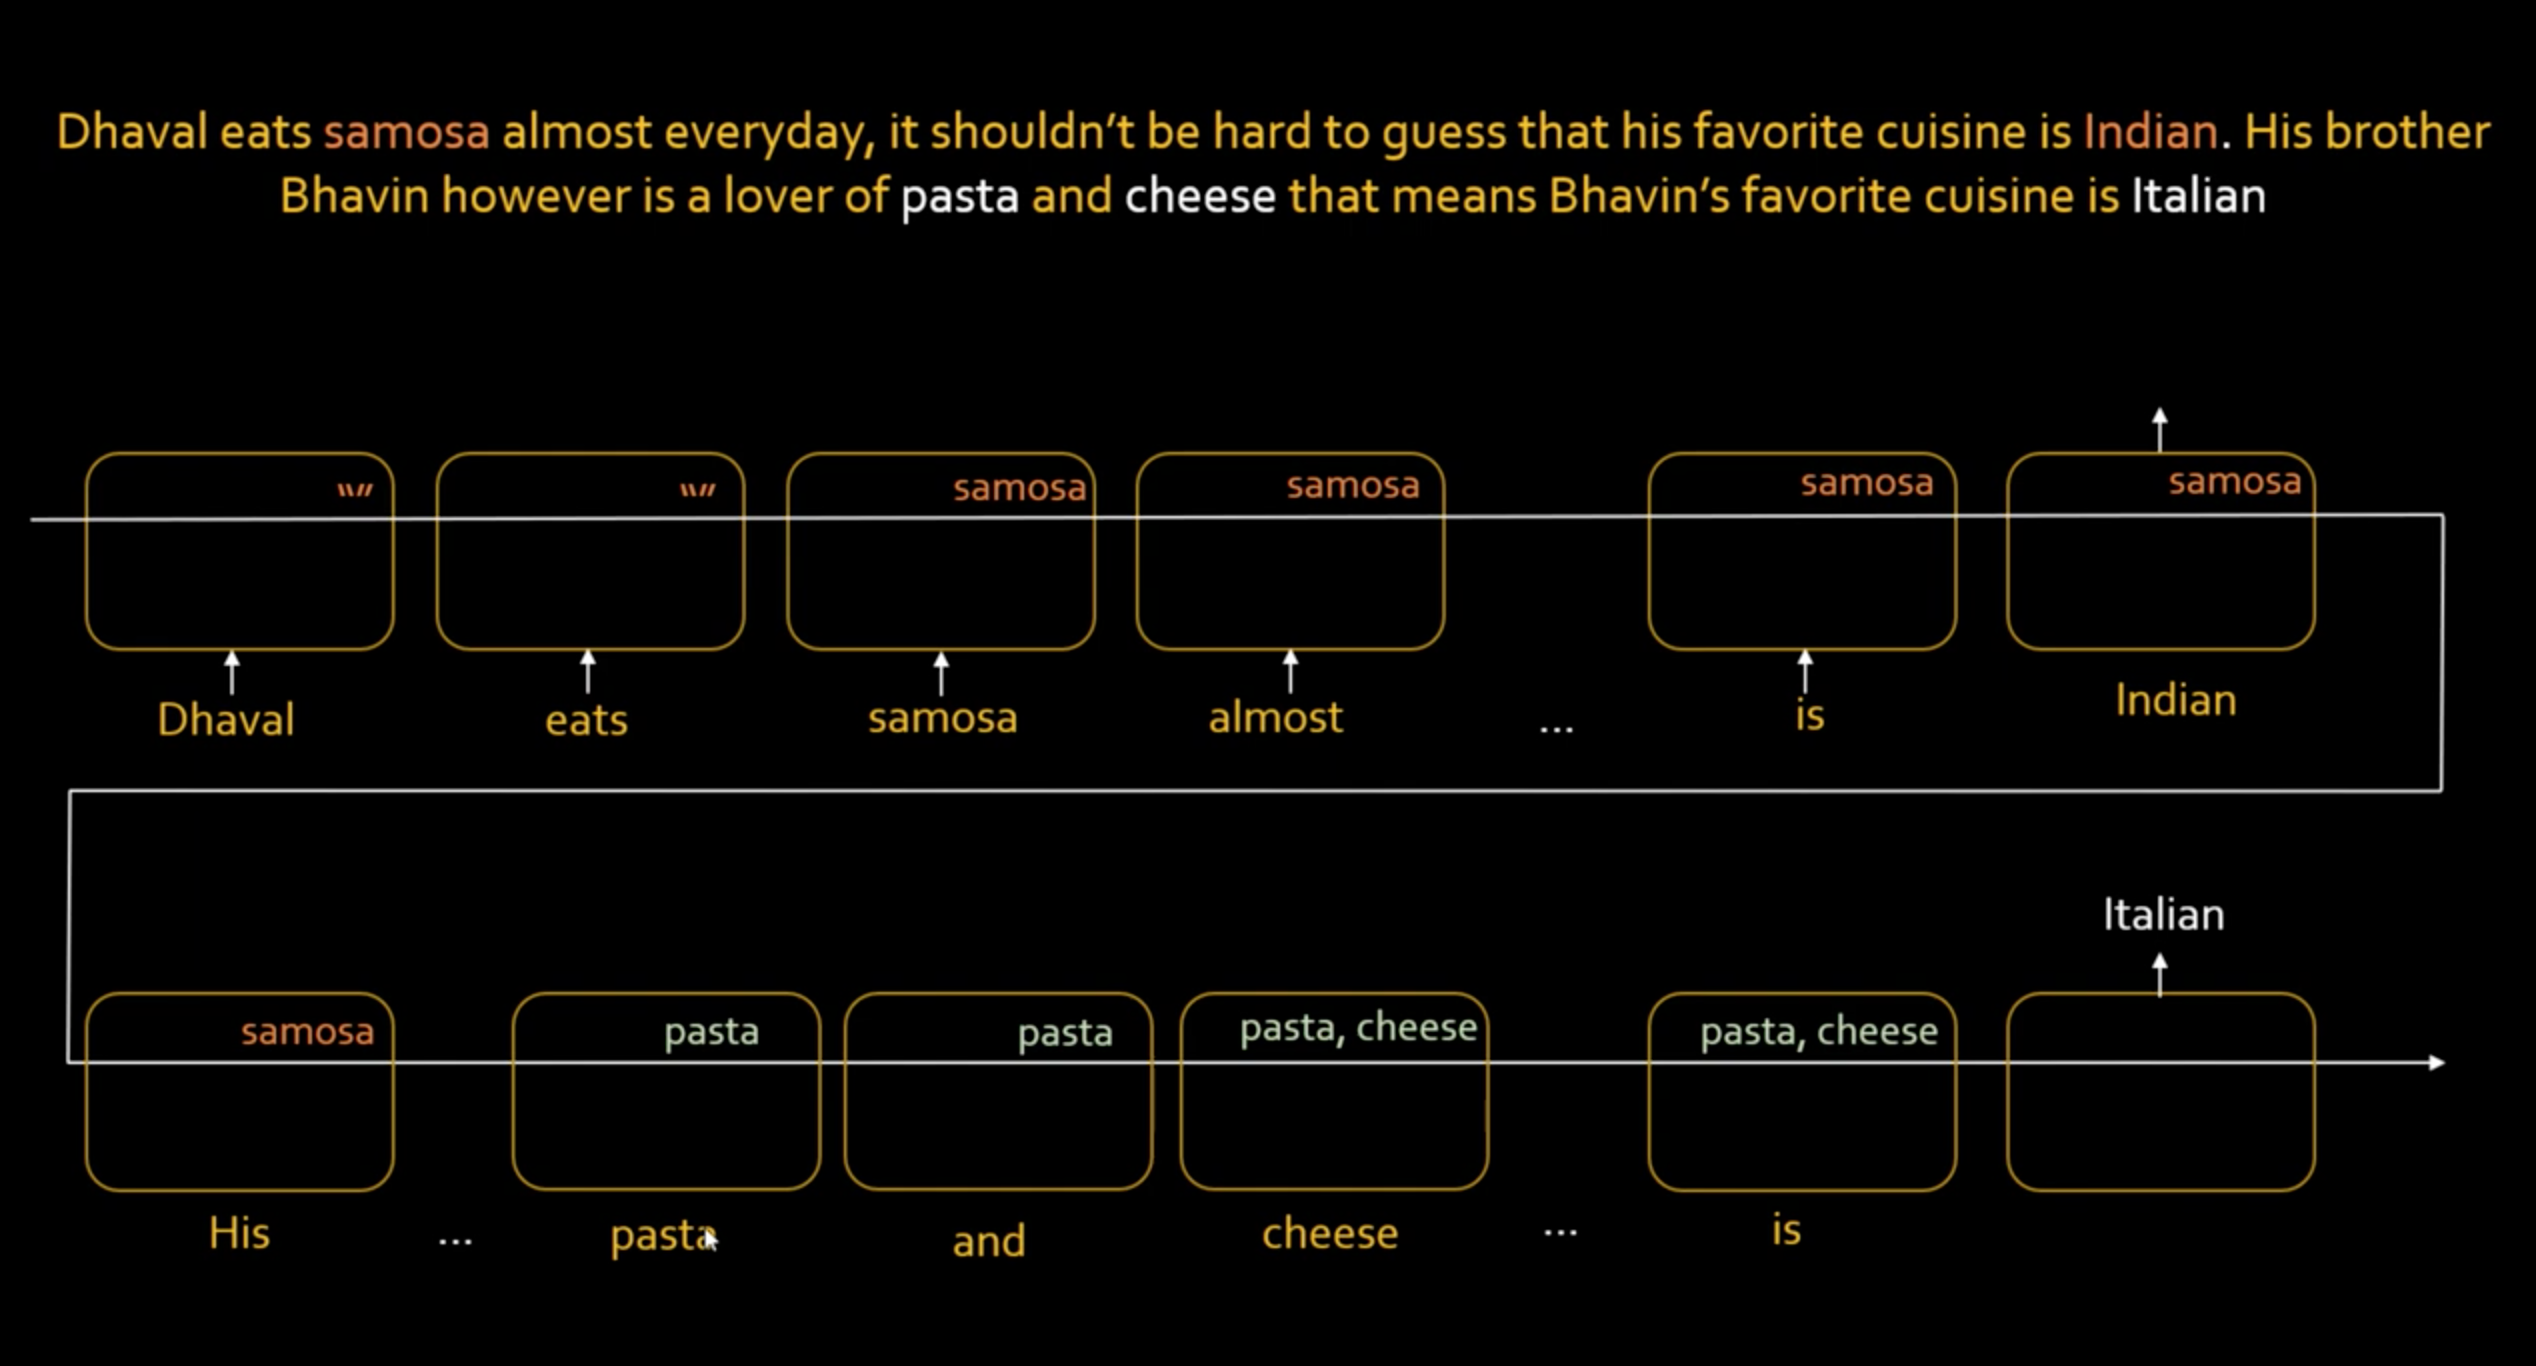

## LSTM Gates

Internal Working of LSTM:

**1) Forget Gate: used to discard any previous word(which is not required or unwanted or it might interfer with newer words). Sigmoid function here is used as Activation function. A 0 vector is multiplied with the word(vector of that word) which needs to be discarded.**

**2) Input Gate: used to add new word to the LSTM memory, sigmoid and tanh function will decide whether its needed to be added or not .**

**3) Output Gate: it decides which words are to be given as ouput and feeded into the RNN layer again.**

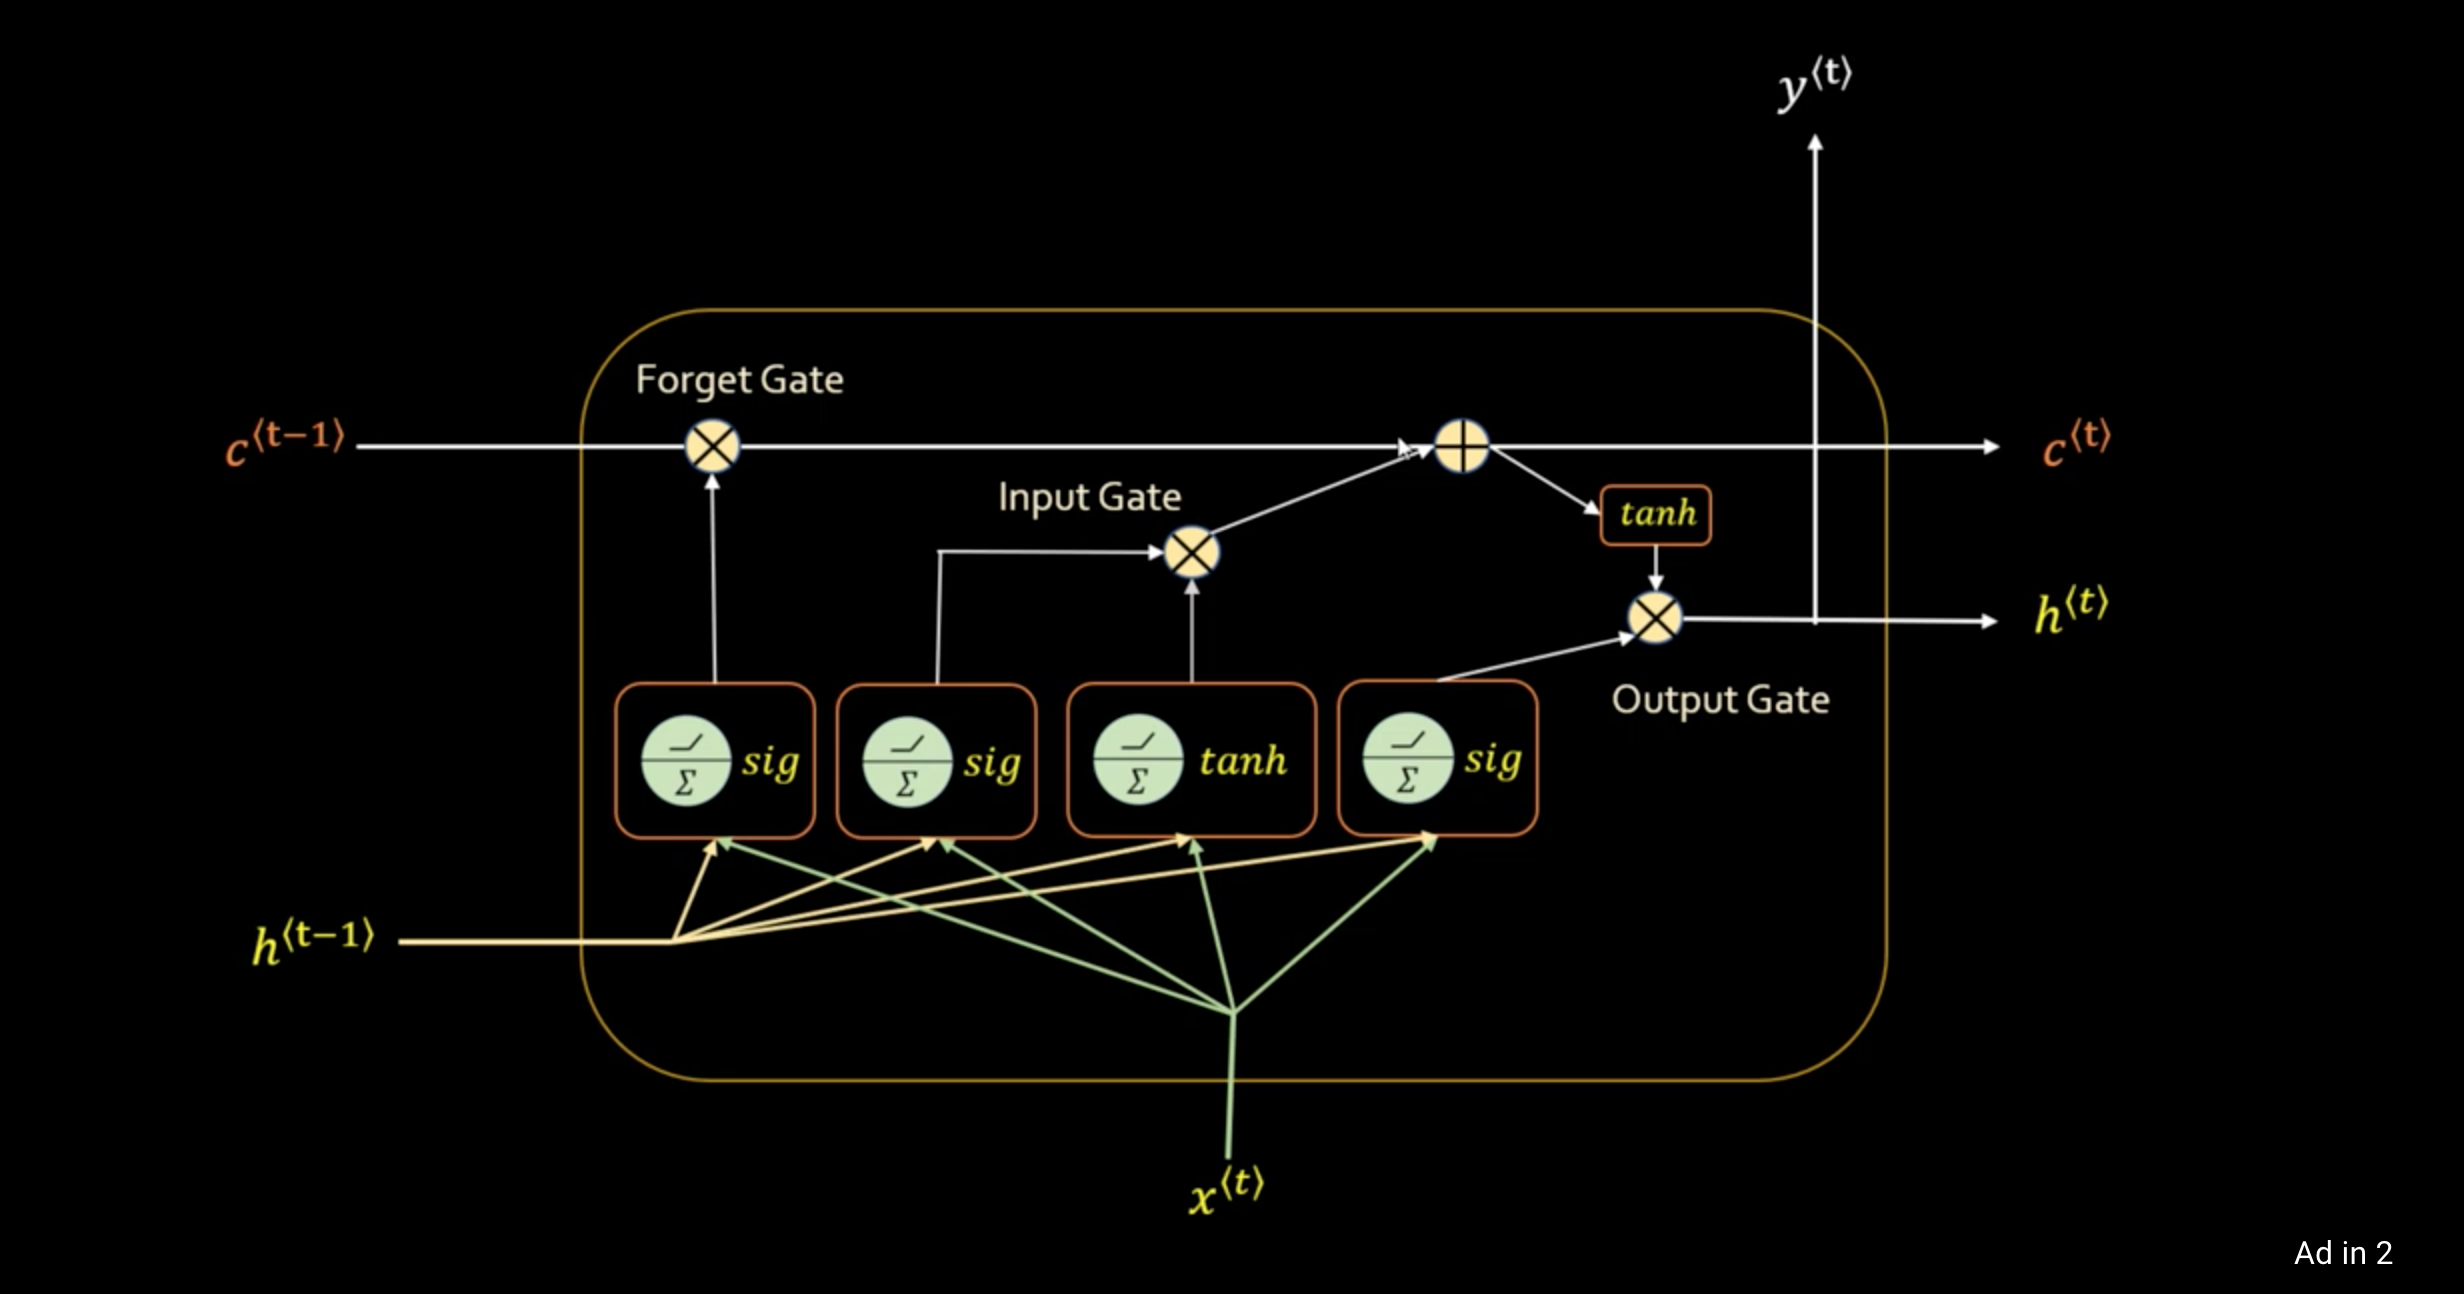

- x(t) is current word
- h(t-1) is previous hidden state
- c(t-1) is previous memory(of samosa in this case)

**Σ : signifies weighted sum. i.e. w1.x1 + w2.x2 + w3.x3 + bias**

Activation function is applied on this weighted sum **(Σ)**

The tanh function is much more extensively used than the sigmoid function since it delivers better training performance for multilayer neural networks.